In [1]:
!pip install svgpathtools svg.path

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from svgpathtools import svg2paths
paths, attributes = svg2paths('led_bezier.svg')
path = paths[0]

In [3]:
from svg.path import Path, Line, Arc, CubicBezier, QuadraticBezier, parse_path

#this should be high for f(x) interpolation (further below)
n = 10000  # number of points segments to get

pts = []
for i in range(0,n+1):
    f = float(i)/float(n)  # will go from 0.0 to 1.0
    complex_point = path.point(f)  # point(x) is method on svg.path to return point x * 100  percent along path
    pts.append((complex_point.real, complex_point.imag))

In [4]:
import numpy as np
graph_path = np.asarray(pts)
graph_max = np.max(graph_path[:,1])
graph_path[:,1] = graph_max-graph_path[:,1]
#map x to [350, 800] range
x_range = [350, 800]
np.min(graph_path[:,0])
graph_path[:,0] = graph_path[:,0]-np.min(graph_path[:,0])
np.max(graph_path[:,0])
graph_path[:,0] = x_range[0]+(x_range[1]-x_range[0])*(graph_path[:,0]/np.max(graph_path[:,0]))

#map y to [0, 1] range
y_range = [0, 1]
np.min(graph_path[:,1])
graph_path[:,1] = graph_path[:,1]-np.min(graph_path[:,1])
np.max(graph_path[:,1])
graph_path[:,1] =y_range[0]+(y_range[1]-y_range[0])*(graph_path[:,1]/np.max(graph_path[:,1]))

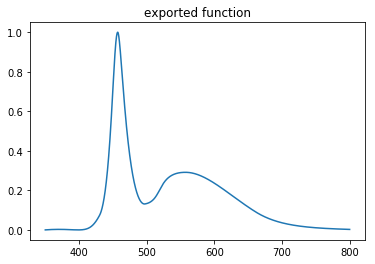

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(graph_path[:,0], graph_path[:,1])
plt.title('exported function')
plt.show()

In [6]:
#approximate function f(x) -> y of the path
def f(x):
    return graph_path[np.argmin(abs(graph_path[:,0]-x)),1]

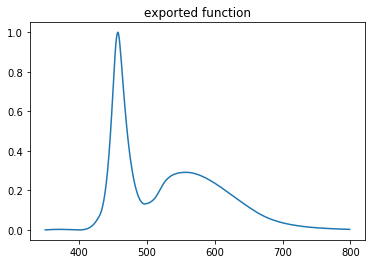

In [7]:
x = range(x_range[0], x_range[1])
y = [(lambda x: f(v))(v) for v in x]

plt.plot(x, y)
plt.title('exported function')
plt.show()